# Decision Tree Classification

In this notebook, we will demonstrate how to build a decision tree classifier to predict the Body Mass Index (BMI) based on people's gender, Height and Weight. We will then: 1) visualize the data, 2) evaluate the accuracy of the predicitons and 3) compare the predictions with the k-NN classifier that was previously trained with this same dataset. The dataset was obtained from Kaggle. Source: [500 Person Gender-Height-Weight-Body Mass Index](https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex)

`Note`: remember the first step is EDA. Even though its not performed in this notebook doesn’t imply that it isn’t needed. The EDA was excluded to focus on the ML task.

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('BMI_data.csv')
df.head(10)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


## Split the data

### One Hot Encoding
Convert categorical data to numeric. In this dataset, we have one categorical feature: `Gender`.
[Click here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to learn more about dummy encoding.

In [3]:
#encode the categorical feature
df = pd.get_dummies(df, drop_first=True) #drop one of the encoded gender columns

### Partition the data
Scikit-learn provides a function called `train_test_split()` that allow us to partition a dataset into train and test sets. [Click here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to learn more about this function.

In [4]:
X   = df[['Height', 'Weight', 'Gender_Male']] #get the input features
y   = df['Index']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    stratify=y      #preserve the distribution of the labels
                                                   )

### Build the classifier
We are building a model to predict the body mass index, and the target feature is categorical. Therefore, we are performing a classification task.

In [5]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=7)

In [6]:
#predict the labels for the test set
y_pred   = dt.predict(X_test)

print('The predicted BMI is: {}'.format(y_pred))

The predicted BMI is: [4 5 4 2 0 5 5 4 4 5 2 3 4 4 5 5 3 4 4 2 2 2 4 4 2 5 2 2 5 4 5 2 2 4 5 5 4
 4 5 5 2 4 5 5 2 5 5 5 0 5 2 4 5 3 2 1 5 5 1 5 4 5 4 3 4 5 5 4 3 1 5 5 4 4
 5 1 5 2 5 5 3 4 4 5 5 5 4 3 5 4 3 4 3 4 5 2 5 5 1 5 3 5 3 5 1 3 5 1 5 4 5
 5 0 4 2 4 4 4 2 1 4 5 5 5 4 2 3 5 5 5 5 5 5 5 3 4 5 5 2 5 4 5 4 2 4 4 2 5
 5 3]


### Evaluate the predictions

In [7]:
# Prediction accuracy
print('The accuracy of the model is: {}'.format(dt.score(X_test, y_test)))

The accuracy of the model is: 0.84


In [8]:
#get the classification report for the decision tree
y_pred = dt.predict(X_test)

target_names = ['Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obesity', 'Extreme Obesity']
print(classification_report(y_test, y_pred, target_names = target_names))

                 precision    recall  f1-score   support

 Extremely Weak       1.00      0.75      0.86         4
           Weak       0.75      0.86      0.80         7
         Normal       0.73      0.76      0.74        21
     Overweight       0.80      0.60      0.69        20
        Obesity       0.80      0.82      0.81        39
Extreme Obesity       0.92      0.97      0.94        59

       accuracy                           0.84       150
      macro avg       0.83      0.79      0.81       150
   weighted avg       0.84      0.84      0.84       150



### Visualize the Tree
There are three different ways to visualize the Tree:
1. The plot_tree() function from sklearn
2. Using graphviz
3. Using dtreeviz

Note: the libraries that were mentioned in `2` and `3` above, may require that you install them on your system. 
- installing graphviz: You can install this library using the information at the following website. [Click here for more information](https://graphviz.org/download/)
- installing dtreeviz: You can install this library using the information at the following GitHub repo. [Click here for more information](https://github.com/parrt/dtreeviz#install). 

### The plot_tree() function from sklearn

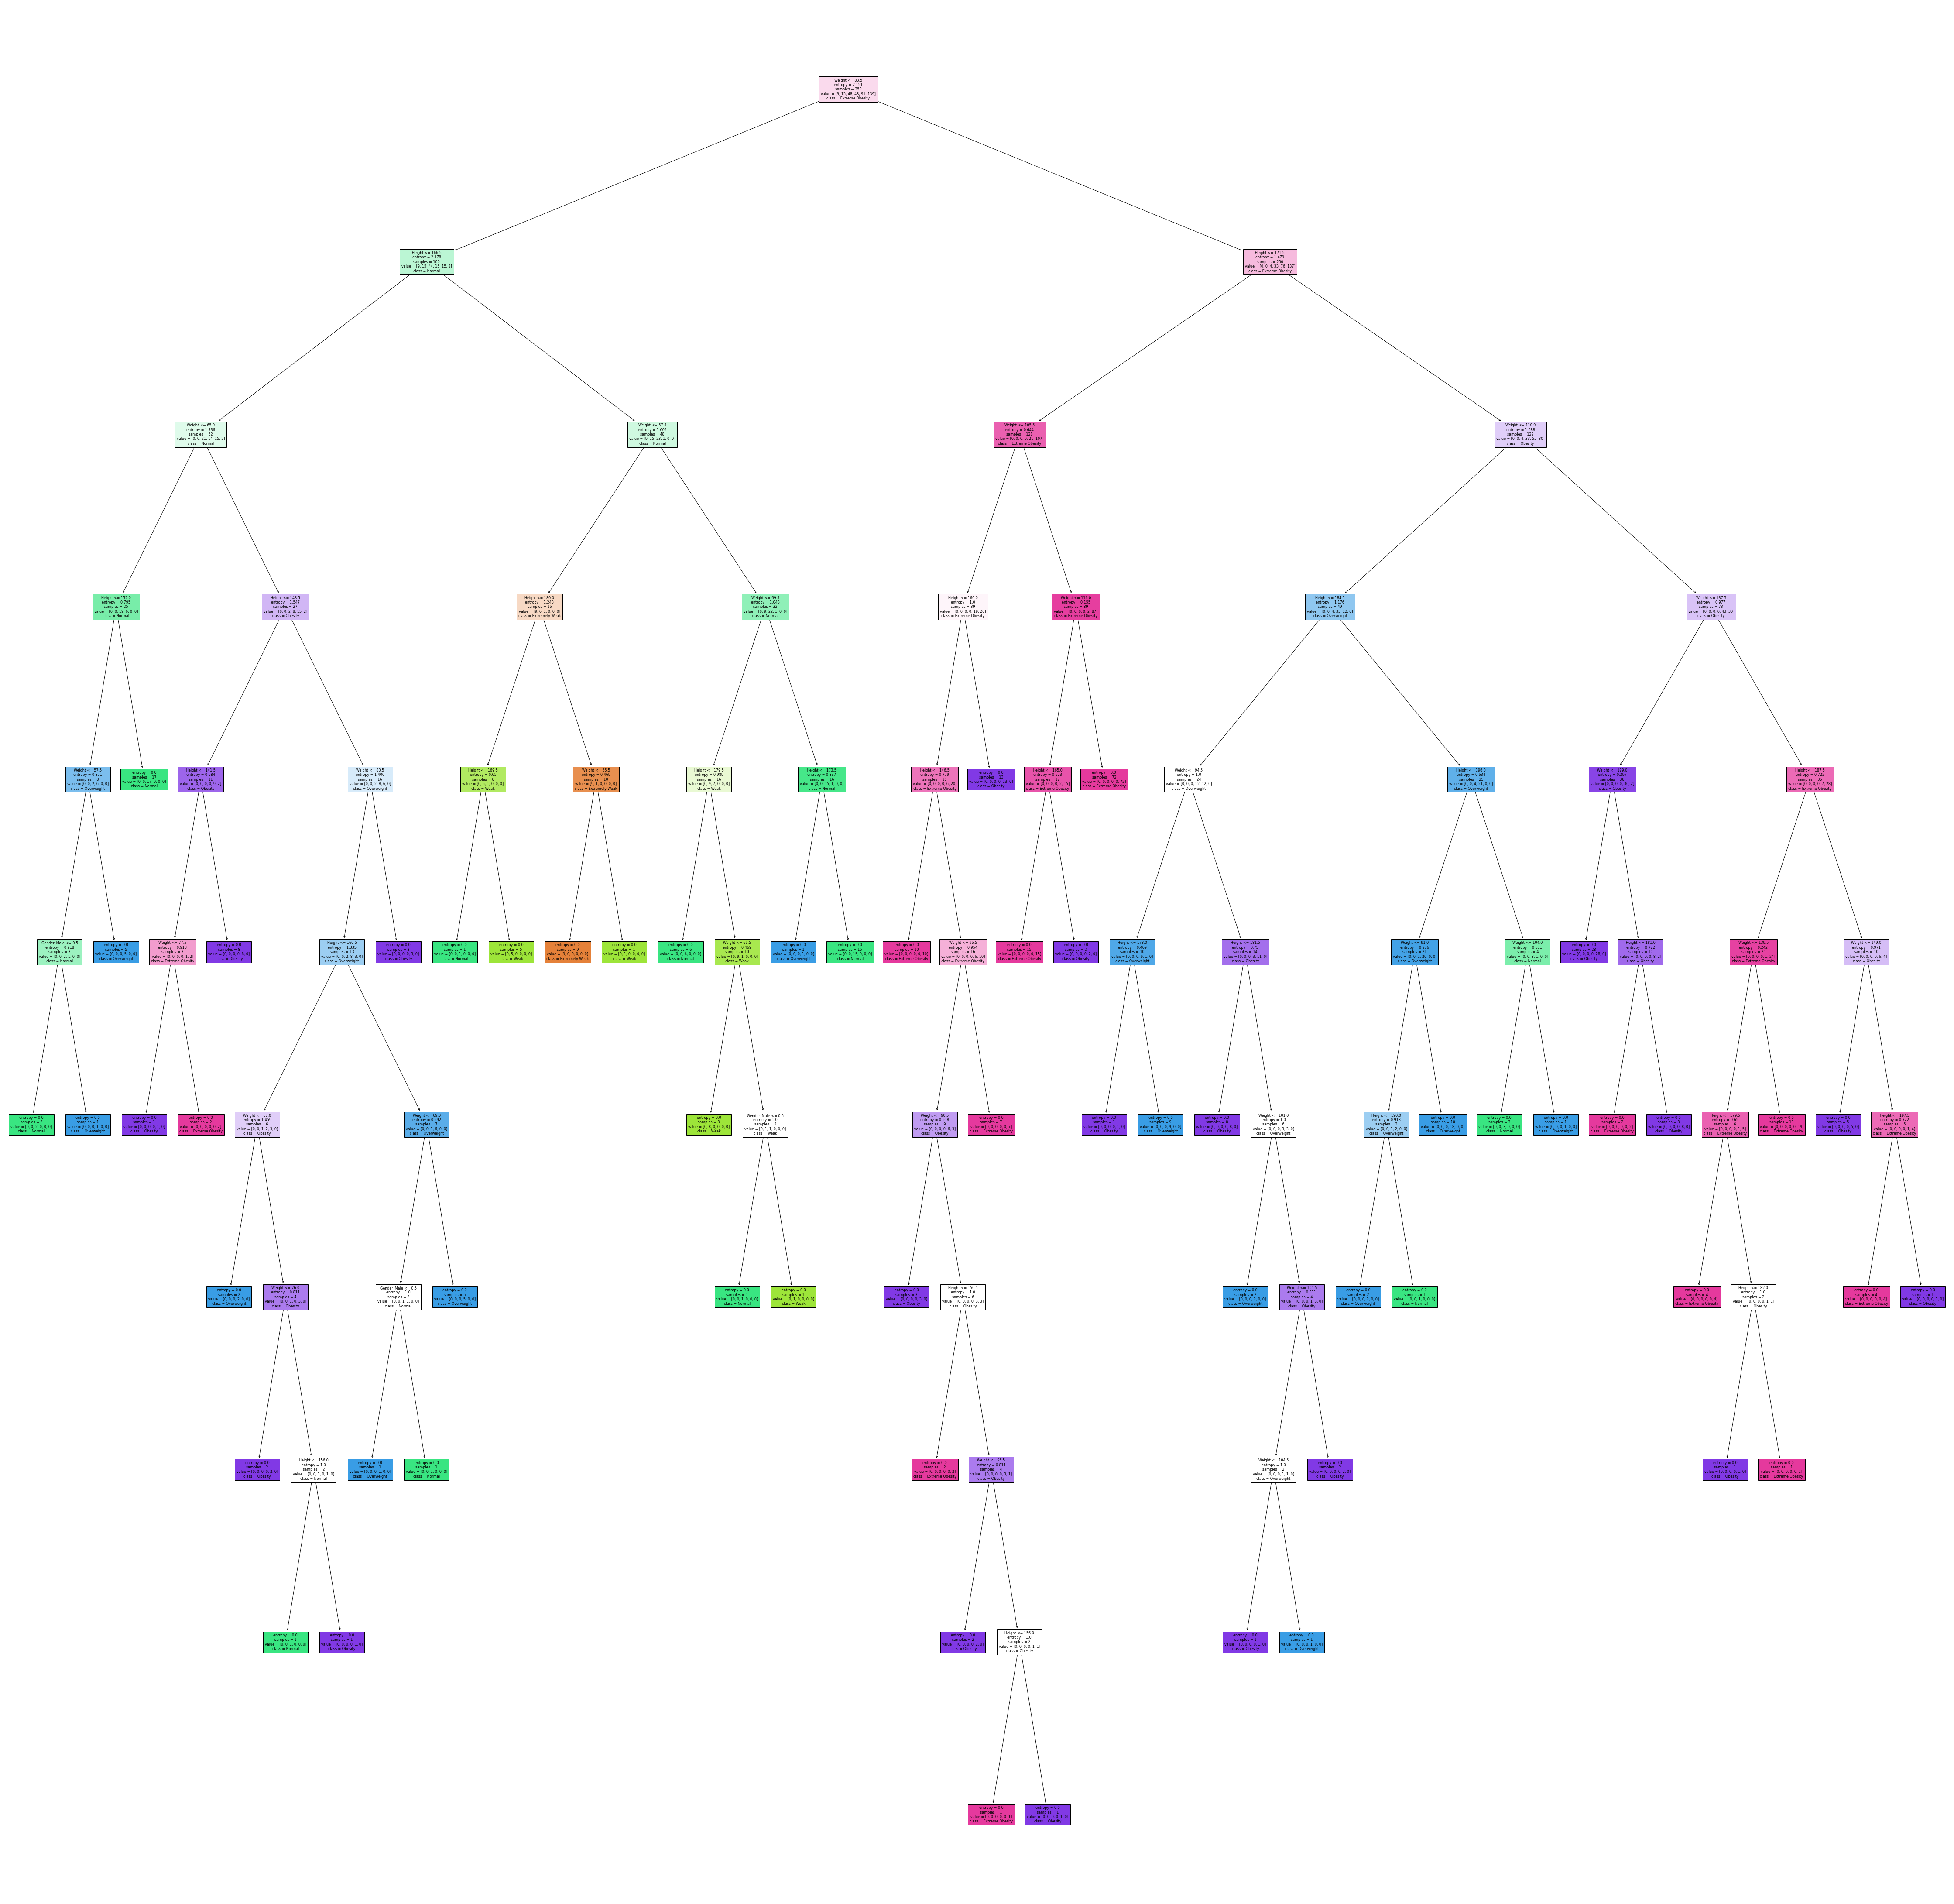

In [9]:
from sklearn import tree

target_names = ['Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obesity', 'Extreme Obesity']

fig = plt.figure(figsize=(80, 80))
tree.plot_tree(dt, 
                   feature_names=['Height', 'Weight', 'Gender_Male'],  
                   class_names=target_names,
                   filled=True, fontsize=8)

plt.show()


### Using graphviz

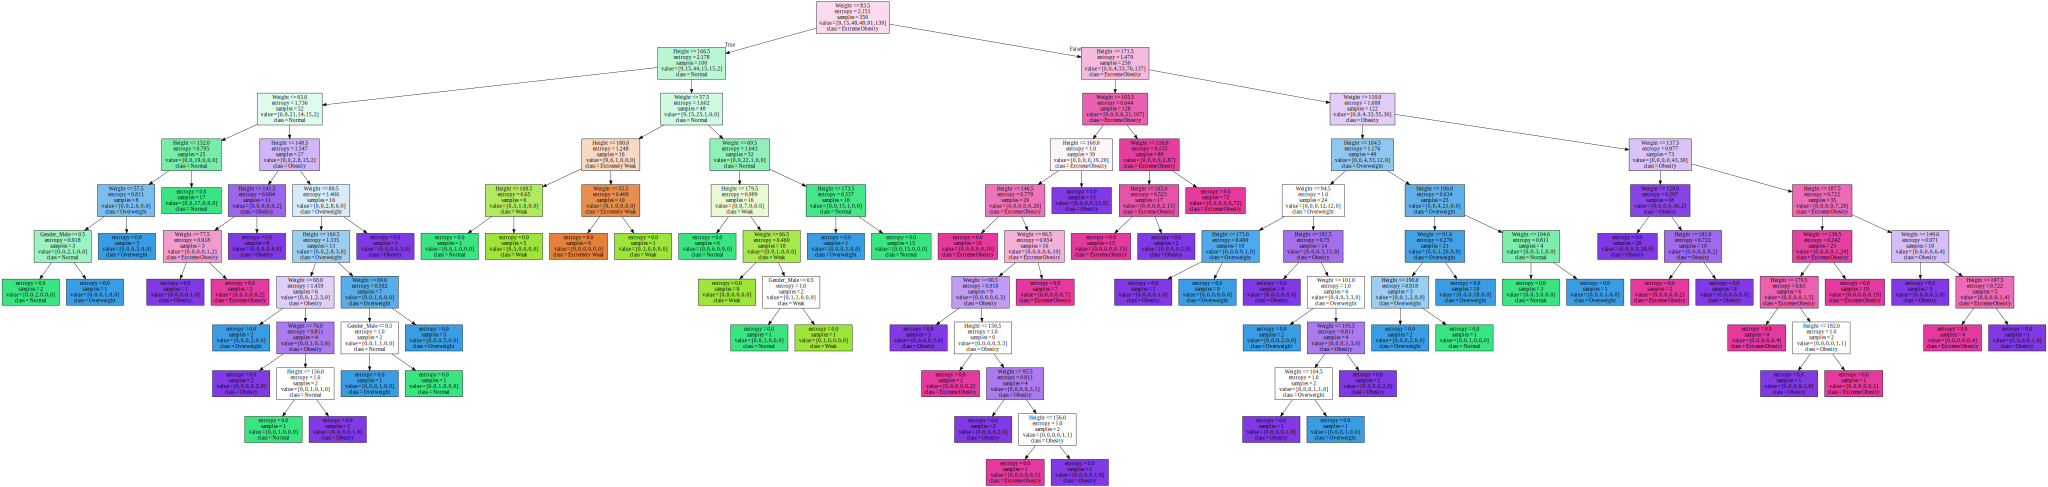

In [10]:
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=['Height', 'Weight', 'Gender_Male'],  
                                class_names=target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format='png') 
graph

In [11]:
graph.render('BMI_decision_tree') #save the image

'BMI_decision_tree.png'

### Using dtreeviz

In [12]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(dt, X, y,
                target_name='Index',
                feature_names=['Height', 'Weight', 'Gender_Male'],  
                class_names=target_names)

viz